In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
# Load labeled dataset
df = pd.read_csv("labeled_thermal_features.csv")

# Separate features (X) and labels (y)
X = df.drop(columns=["Frame", "Porosity Label"])  # Exclude 'Frame' (not useful for training)
y = df["Porosity Label"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE to balance dataset
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase anomalies to 20% of normal samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective="binary:logistic",  
    eval_metric="logloss",
    n_estimators=100,  
    learning_rate=0.05, 
    max_depth=3,  
    subsample=0.7,  
    colsample_bytree=0.7,
    reg_lambda=1,  
    reg_alpha=0.5,
    random_state=42
)

# Train the model
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation results
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Save the trained model
xgb_classifier.save_model("xgboost_anomaly_model.json")
print("✅ XGBoost model saved as 'xgboost_anomaly_model.json'.") 




XGBoost Model Evaluation:
Accuracy: 0.99
Confusion Matrix:
[[447   2]
 [  5  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       449
           1       0.89      0.76      0.82        21

    accuracy                           0.99       470
   macro avg       0.94      0.88      0.91       470
weighted avg       0.98      0.99      0.98       470

✅ XGBoost model saved as 'xgboost_anomaly_model.json'.


In [3]:
print(f"Dataset Shape: {df.shape}")  # Should be (1564, N) if all frames are included


Dataset Shape: (1564, 13)


In [4]:
print("Missing Labels:", df["Porosity Label"].isna().sum())  # Should be 0


Missing Labels: 0


In [5]:
print(df["Porosity Label"].value_counts())  # Should show how many 0s and 1s exist


Porosity Label
0    1493
1      71
Name: count, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Train set size: 1251
Test set size: 313


<function matplotlib.pyplot.show(close=None, block=None)>

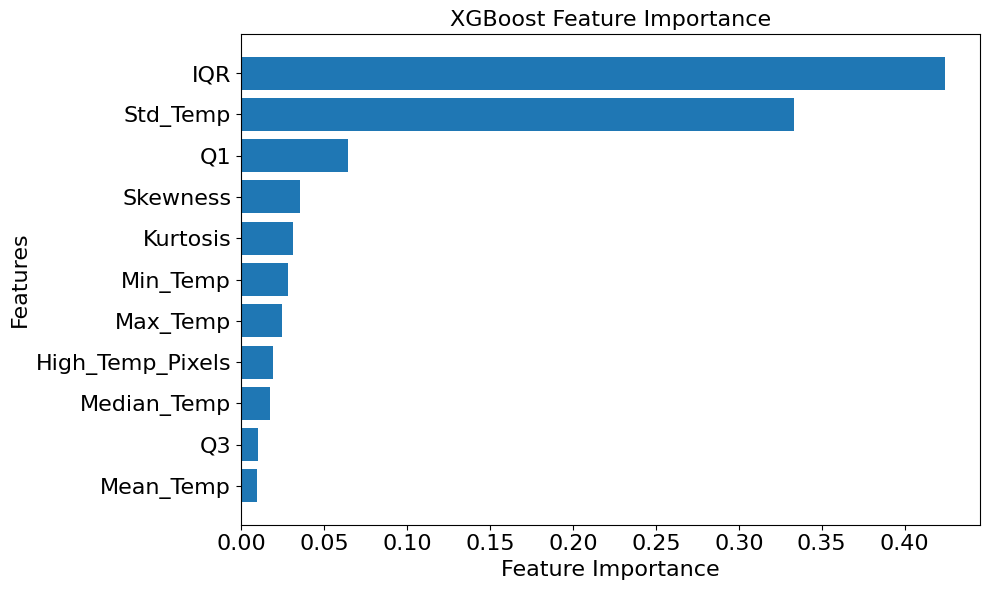

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Özellik önemlerini ve isimlerini al
feature_importance = xgb_classifier.feature_importances_
feature_names = X_train.columns

# Sıralama işlemi (önem değerine göre azalan)
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)

# Yazı boyutlarını artır
plt.xlabel("Feature Importance", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("XGBoost Feature Importance", fontsize=16)

# Eksen değerlerinin yazı boyutları
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)

# En önemli özelliği en üstte göstermek için
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show

